# Introduction to PostgreSQL DROP PROCEDURE statement

The `drop procedure` statement deletes one or more stored procedures from a database.

The following illustrates the syntax of the `drop procedure` statement:

```postgresql
drop procedure [if exists] procedure_name (argument_list)
[cascade | restrict] 
```

In this syntax:
* First, specify the name (`procedure_name`) of the stored procedure that you want to remove after the drop procedure keywords.
* Second, use the `if exists` option if you want PostgreSQL to issue a notice instead of an error if you drop a stored procedure that does not exist.
* Third, specify the argument list of the stored procedure if the stored procedure’s name is not unique in the database. Note that stored procedures that have different argument lists can share the same name. PostgreSQL needs the argument list to determine which stored procedure that you want to remove.
* Finally, use the `cascade` option to drop a stored procedure and its dependent objects, the objects that depend on those objects, and so on. The default option is `restrict` that will reject the removal of the stored procedure in case it has any dependent objects.

To drop multiple stored procedures, you specify a comma-separated list of stored procedure names after the `drop procedure` keyword, like this:

```postgresql
drop procedure [if exists] name1, name2, ...; 
```


# Creating sample stored procedures

Let’s create a couple of stored procedures that manage actors so that you can learn how to drop them:

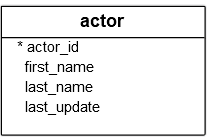

The following `insert_actor()` stored procedure inserts a new row into the `actor` table. It accepts two arguments, which are the first name and last name of the actor.

```postgresql
create or replace procedure insert_actor(
	fname varchar,
	lname varchar)
language plpgsql
as $$
begin
	insert into actor(first_name, last_name)
	values('John','Doe');
end;
$$; 
```

The following `insert_actor` stored procedure also inserts a row into the `actor` table. However, it accepts one argument, which is the full name of the actor. The `insert_actor()` uses the `split_part()` function to split the full name into first name and last name before inserting them into the `actor` table.

```postgresql
create or replace procedure insert_actor(
	full_name varchar
)
language plpgsql
as $$
declare
	fname varchar;
	lname varchar;
begin
	-- split the fullname into first & last name
	select
		split_part(full_name,' ', 1),
		split_part(full_name,' ', 2)
	into fname,
	     lname;

	-- insert first & last name into the actor table
	insert into actor(first_name, last_name)
	values(fname, lname);
end;
$$; 
```

The following stored procedure deletes an actor by id:

```postgresql
create or replace procedure delete_actor(
	p_actor_id int
)
language plpgsql
as $$
begin
	delete from actor
	where actor_id = p_actor_id;
end;
$$; 
```

The following stored procedure updates the first name and last name of an actor:

```postgresql
create or replace procedure update_actor(
	p_actor_id int,
	fname varchar,
	lname varchar
)
language plpgsql
as $$
begin
	update actor
	set first_name = fname,
	    last_name = lname
	where actor_id = p_actor_id;
end;
$$; 
```


# PostgreSQL Drop Procedure examples

First, attempt to drop the `insert_actor` stored procedure:

```postgresql
drop procedure insert_actor; 
```

PostgreSQL issued the following error:

```
ERROR:  procedure name "insert_actor" is not unique
HINT:  Specify the argument list to select the procedure unambiguously.
SQL state: 42725
```

Because there are two `insert_actor` stored procedures, you need to specify the argument list so that PostgreSQL can select the right stored procedure to drop.

Second, drop the `insert_actor(varchar)` stored procedure that accepts one argument:

```postgresql
drop procedure insert_actor(varchar); 
```

Since the `insert_actor` stored procedure is unique now, you can drop it without specifying the argument list:

```postgresql
drop procedure insert_actor; 
```

It is the same as:

```postgresql
drop procedure insert_actor(varchar,varchar); 
```

Third, remove two stored procedures using a `single drop` procedure statement:

```postgresql
drop procedure
	delete_actor,
	update_actor; 
```